## The dataset is from Japan’s Ministry of Health, Labor, and Welfare, which published in 2016 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import re
import seaborn as sns; sns.set() 
sns.set_style('whitegrid')
sns.set_palette('Set1')
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker
%matplotlib inline
encoding = "SHIFT_JIS"

In [38]:
international_couples_1965_2015=pd.read_csv('h11.csv',encoding=encoding,header=11)
international_couples_1965_2015.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,妻 外 国,夫 外 国,Unnamed: 6,妻 外 国.1,夫 外 国.1
0,NaN,NaN,NaN,Total,Japanese groom and foreign bride,Japanese bride and foreign groom,Total,Japanese groom and foreign bride,Japanese bride and foreign groom
1,1965.0,昭和40年,954852.0,4156,1067,3089,0.4,0.1,0.3
2,66.0,41,940120.0,3976,1056,2920,0.4,0.1,0.3
3,67.0,42,953096.0,4485,1348,3137,0.5,0.1,0.3
4,68.0,43,956312.0,4784,1460,3324,0.5,0.2,0.3
5,69.0,44,984142.0,5079,1719,3360,0.5,0.2,0.3
6,1970.0,45,1029405.0,5546,2108,3438,0.5,0.2,0.3
7,71.0,46,1091229.0,5590,2350,3240,0.5,0.2,0.3
8,72.0,47,1099984.0,5996,2674,3322,0.5,0.2,0.3
9,73.0,48,1071923.0,6193,2849,3344,0.6,0.3,0.3


In [39]:
print(international_couples_1965_2015.iat[0, 3])

Total


In [40]:
international_couples_1965_2015.iat[0, 3]='International_couple_Number'
international_couples_1965_2015.iat[0, 6]='Total%'

In [41]:
international_couples_1965_2015.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,妻 外 国,夫 外 国,Unnamed: 6,妻 外 国.1,夫 外 国.1
0,NaN,NaN,NaN,International_couple_Number,Japanese groom and foreign bride,Japanese bride and foreign groom,Total%,Japanese groom and foreign bride,Japanese bride and foreign groom
1,1965.0,昭和40年,954852.0,4156,1067,3089,0.4,0.1,0.3
2,66.0,41,940120.0,3976,1056,2920,0.4,0.1,0.3
3,67.0,42,953096.0,4485,1348,3137,0.5,0.1,0.3
4,68.0,43,956312.0,4784,1460,3324,0.5,0.2,0.3


In [42]:
international_couples_1965_2015=international_couples_1965_2015.rename(columns=international_couples_1965_2015.iloc[0])
international_couples_1965_2015=international_couples_1965_2015.drop(international_couples_1965_2015.index[0])
international_couples_1965_2015.head()

,NaN,NaN,NaN,International_couple_Number,Japanese groom and foreign bride,Japanese bride and foreign groom,Total%,Japanese groom and foreign bride,Japanese bride and foreign groom
1,1965.0,昭和40年,954852.0,4156,1067,3089,0.4,0.1,0.3
2,66.0,41,940120.0,3976,1056,2920,0.4,0.1,0.3
3,67.0,42,953096.0,4485,1348,3137,0.5,0.1,0.3
4,68.0,43,956312.0,4784,1460,3324,0.5,0.2,0.3
5,69.0,44,984142.0,5079,1719,3360,0.5,0.2,0.3


In [43]:
international_couples_1965_2015=international_couples_1965_2015.reset_index(drop=True)

In [44]:
international_couples_1965_2015.columns

Index([                               nan,                                nan,
                                      nan,      'International_couple_Number',
       'Japanese groom and foreign bride', 'Japanese bride and foreign groom',
                                 'Total%', 'Japanese groom and foreign bride',
       'Japanese bride and foreign groom'],
      dtype='object')

In [45]:
#renaming columns
new_cols=['Year','Year_J','Total_marriages_couple',                      'International_couple_Number',
       'Japanese groom and foreign bride', 'Japanese bride and foreign groom',
                                 'Total%', 'Japanese groom and foreign bride%',
       'Japanese bride and foreign groom%']
international_couples_1965_2015.columns=new_cols
international_couples_1965_2015.head()

,Year,Year_J,Total_marriages_couple,International_couple_Number,Japanese groom and foreign bride,Japanese bride and foreign groom,Total%,Japanese groom and foreign bride%,Japanese bride and foreign groom%
0,1965.0,昭和40年,954852.0,4156,1067,3089,0.4,0.1,0.3
1,66.0,41,940120.0,3976,1056,2920,0.4,0.1,0.3
2,67.0,42,953096.0,4485,1348,3137,0.5,0.1,0.3
3,68.0,43,956312.0,4784,1460,3324,0.5,0.2,0.3
4,69.0,44,984142.0,5079,1719,3360,0.5,0.2,0.3


In [46]:
def to_4digit(year):
    if year < 1900:
        if year >= 65:
            return 1900 + year
        return 2000 + year
    return year

international_couples_1965_2015['Year']=international_couples_1965_2015['Year'].apply(to_4digit).astype(float)

In [47]:
print(international_couples_1965_2015.iloc[0, 1])

昭和40年


In [48]:
international_couples_1965_2015['Year_J']=international_couples_1965_2015['Year_J'].replace('平成元','1')

international_couples_1965_2015['Year_J'] = international_couples_1965_2015['Year_J'].str.replace('昭和', '').str.replace('年', '')

In [49]:
international_couples_1965_2015

,Year,Year_J,Total_marriages_couple,International_couple_Number,Japanese groom and foreign bride,Japanese bride and foreign groom,Total%,Japanese groom and foreign bride%,Japanese bride and foreign groom%
0,1965.0,40,954852.0,4156,1067,3089,0.4,0.1,0.3
1,1966.0,41,940120.0,3976,1056,2920,0.4,0.1,0.3
2,1967.0,42,953096.0,4485,1348,3137,0.5,0.1,0.3
3,1968.0,43,956312.0,4784,1460,3324,0.5,0.2,0.3
4,1969.0,44,984142.0,5079,1719,3360,0.5,0.2,0.3
5,1970.0,45,1029405.0,5546,2108,3438,0.5,0.2,0.3
6,1971.0,46,1091229.0,5590,2350,3240,0.5,0.2,0.3
7,1972.0,47,1099984.0,5996,2674,3322,0.5,0.2,0.3
8,1973.0,48,1071923.0,6193,2849,3344,0.6,0.3,0.3
9,1974.0,49,1000455.0,6359,3177,3182,0.6,0.3,0.3


In [50]:
international_couples_1965_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
Year                                 51 non-null float64
Year_J                               51 non-null object
Total_marriages_couple               51 non-null float64
International_couple_Number          51 non-null object
Japanese groom and foreign bride     51 non-null object
Japanese bride and foreign groom     51 non-null object
Total%                               51 non-null object
Japanese groom and foreign bride%    51 non-null object
Japanese bride and foreign groom%    51 non-null object
dtypes: float64(2), object(7)
memory usage: 3.7+ KB


In [51]:
international_couples_1965_2015=international_couples_1965_2015.astype(float)
international_couples_1965_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
Year                                 51 non-null float64
Year_J                               51 non-null float64
Total_marriages_couple               51 non-null float64
International_couple_Number          51 non-null float64
Japanese groom and foreign bride     51 non-null float64
Japanese bride and foreign groom     51 non-null float64
Total%                               51 non-null float64
Japanese groom and foreign bride%    51 non-null float64
Japanese bride and foreign groom%    51 non-null float64
dtypes: float64(9)
memory usage: 3.7 KB


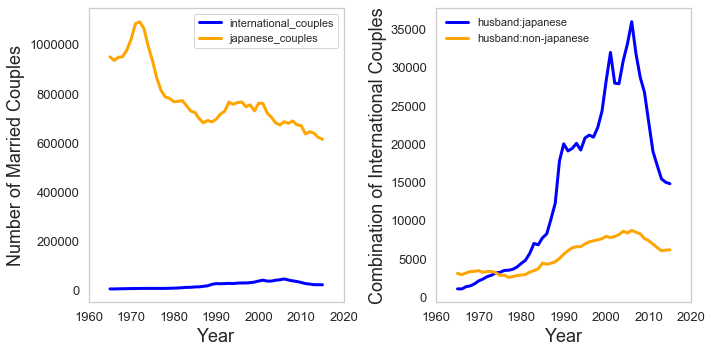

In [53]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1,2,1)

year=international_couples_1965_2015['Year']

y1=international_couples_1965_2015['International_couple_Number']
y2=international_couples_1965_2015['Total_marriages_couple']-international_couples_1965_2015['International_couple_Number']
ax1.plot(year,y1,label='international_couples', color='blue',linewidth=3)
ax1.plot(year,y2,label='japanese_couples', color='orange',linewidth=3)

ax1.set_xlim(1960,2020,10)
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Number of Married Couples', fontsize=18)
ax1.tick_params(labelsize=13)

plt.grid(False)
ax1.legend()
plt.tight_layout() 

ax2 = fig.add_subplot(1,2,2)
y3=international_couples_1965_2015['Japanese groom and foreign bride']
y4=international_couples_1965_2015['Japanese bride and foreign groom']

ax2.plot(year,y3,label='husband:japanese', color='blue',linewidth=3)
ax2.plot(year,y4,label='husband:non-japanese', color='orange',linewidth=3)

ax2.set_xlim(1960,2020,10)
ax2.set_xlabel('Year', fontsize=18)
ax2.set_ylabel('Combination of International Couples', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)



ax2.legend(frameon=False) 

plt.subplots_adjust(wspace=0.6, hspace=0.4)
plt.tight_layout() 
plt.grid(False)
plt.savefig('figure2.png')
plt.show()
